In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
df = pd.read_csv("iris.data", names=list(string.ascii_uppercase[:5]))
lb = LabelEncoder()
for i in df.columns:
    try:
        df[i]/2
    except:
        df[i] = lb.fit_transform(df[i])
df.head()

,A,B,C,D,E
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = pd.read_csv("wine.data", names=list(string.ascii_uppercase[:13]))
lb = LabelEncoder()
for i in df.columns:
    try:
        df[i]/2
    except:
        df[i] = lb.fit_transform(df[i])
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


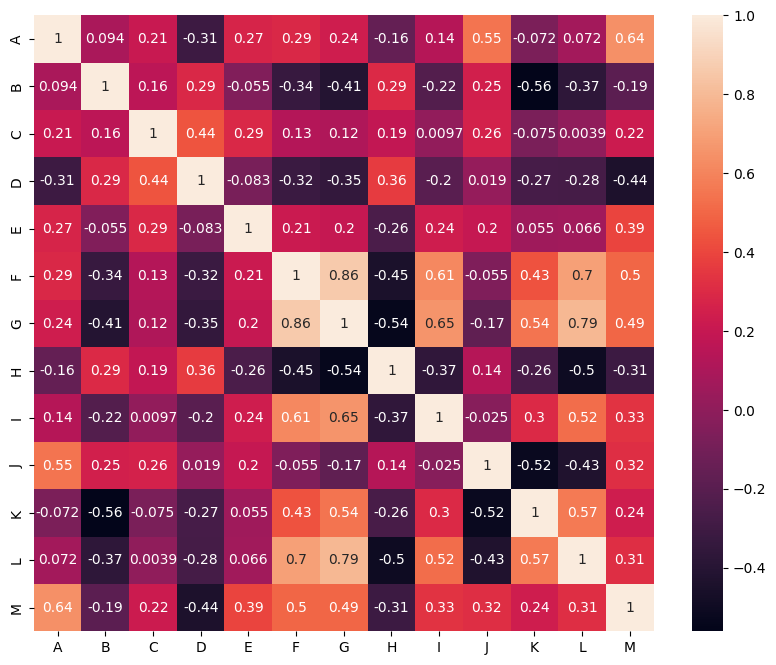

In [ ]:
plt.figure(figsize=(10, 8))
correlation_mat = df.corr(method="pearson")
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
correlation_mat = np.array(correlation_mat)
Mean_graph = np.zeros((len(df.columns), len(df.columns)))
Median_graph = np.zeros((len(df.columns), len(df.columns)))
for i in range(len(correlation_mat)):
    mean = np.mean(correlation_mat[:, i])
    median = np.median(correlation_mat[:, i])
    for j in range(len(correlation_mat)):
        if correlation_mat[j][i] >= mean:
            Mean_graph[j][i] = 1
        if correlation_mat[j][i] >= median:
            Median_graph[j][i] = 1
        continue

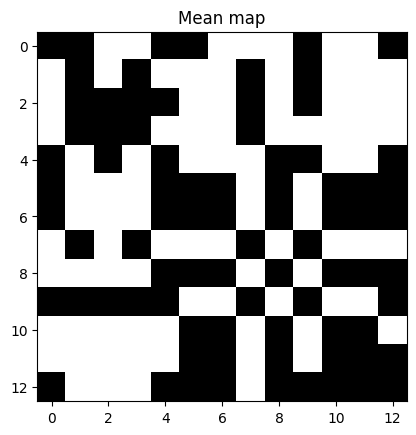

In [ ]:
plt.imshow(Mean_graph, cmap="binary")
plt.title("Mean map")
plt.show()

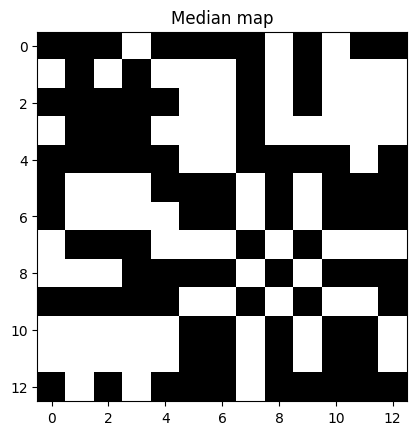

In [ ]:
plt.imshow(Median_graph, cmap="binary")
plt.title("Median map")
plt.show()

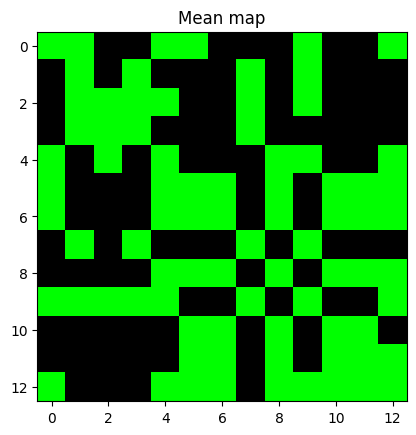

In [ ]:
colors = [(0, 0, 0), (0, 1, 0)]
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
plt.imshow(Mean_graph, cmap=cmap)
plt.title("Mean map")
plt.show()

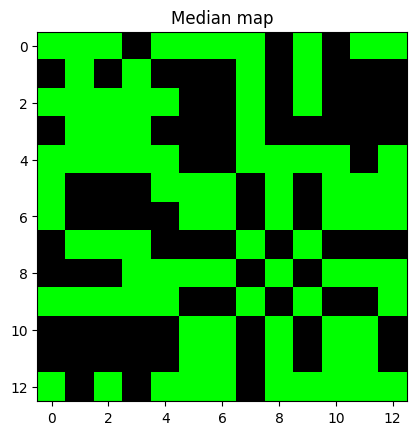

In [ ]:
plt.imshow(Median_graph, cmap=cmap)
plt.title("Median map")
plt.show()

In [ ]:
permuted_df = df.sample(frac=1, random_state=np.random.RandomState())

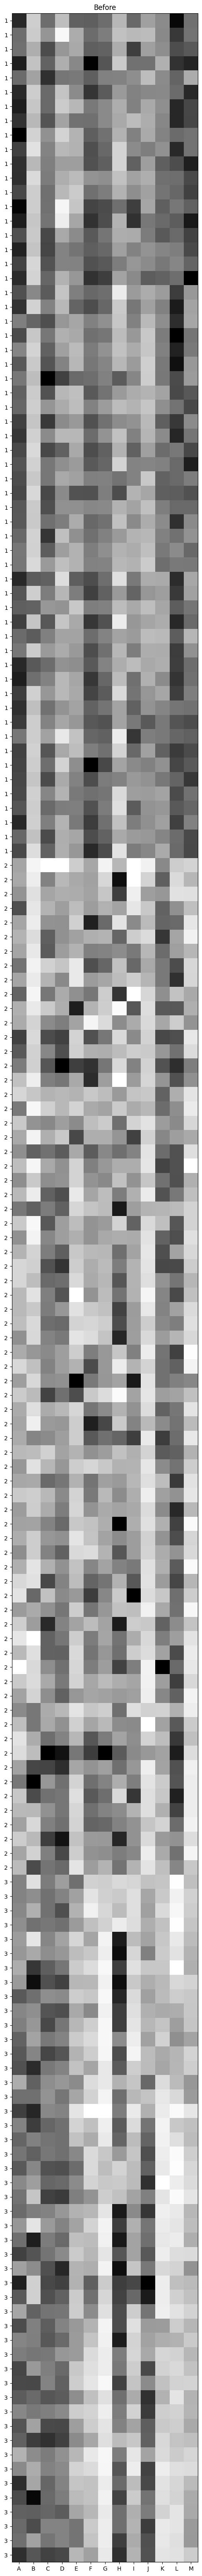

In [ ]:
array = df.values
scaler = MinMaxScaler()
array = scaler.fit_transform(array)
plt.figure(figsize=(25, 80))
plt.imshow(array, cmap='binary')
plt.xticks(range(df.shape[1]), df.columns)
plt.yticks(range(df.shape[0]), df.index)
plt.title("Before")
plt.show()

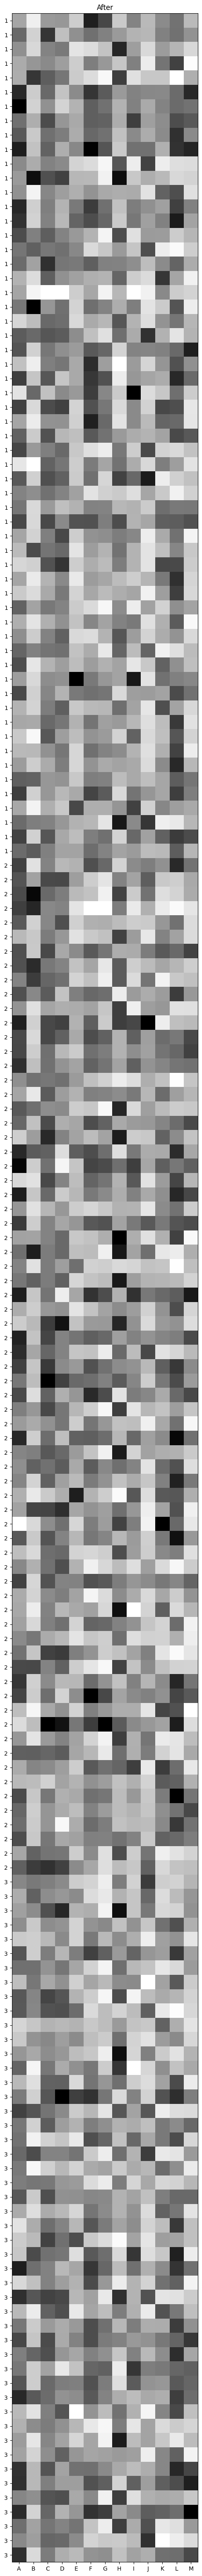

In [ ]:
array = permuted_df.values
scaler = MinMaxScaler()
array = scaler.fit_transform(array)
plt.figure(figsize=(25, 80))
plt.imshow(array, cmap='binary')
plt.xticks(range(df.shape[1]), df.columns)
plt.yticks(range(df.shape[0]), df.index)
plt.title("After")
plt.show()

In [ ]:
import numpy as np

# Load the image as a 2D matrix
image = np.array(permuted_df.values)

# Calculate the signature for each row
signatures = []
for row in image:
    row_sum = np.sum(row)
    row_mean = np.mean(row)
    signature = row_sum * row_mean
    signatures.append(signature)

sorted_indices = np.argsort(signatures)
sorted_data = image[sorted_indices]

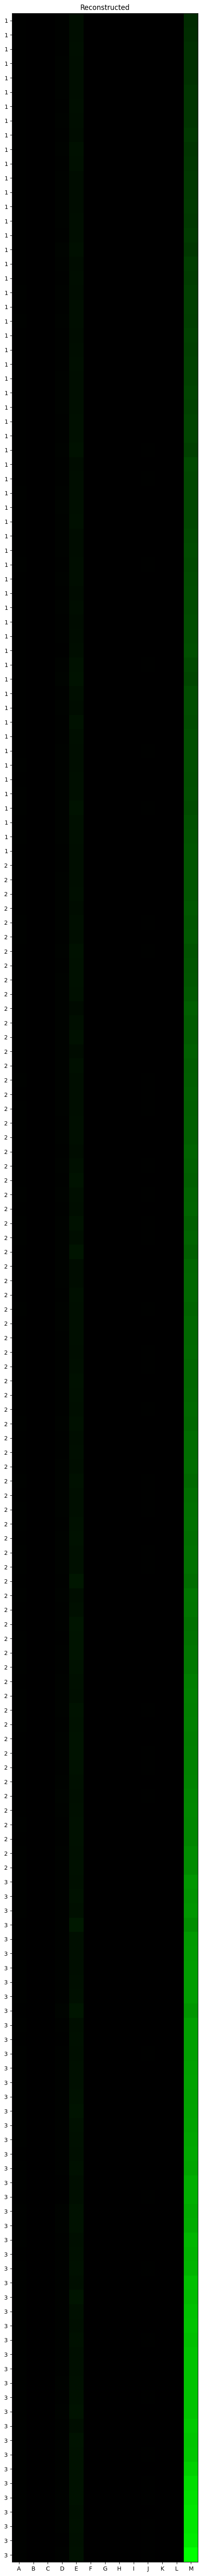

In [ ]:
plt.figure(figsize=(25, 80))
plt.imshow(sorted_data, cmap=cmap)
plt.xticks(range(df.shape[1]), df.columns)
plt.yticks(range(df.shape[0]), df.index)
plt.title("Reconstructed")
plt.show()

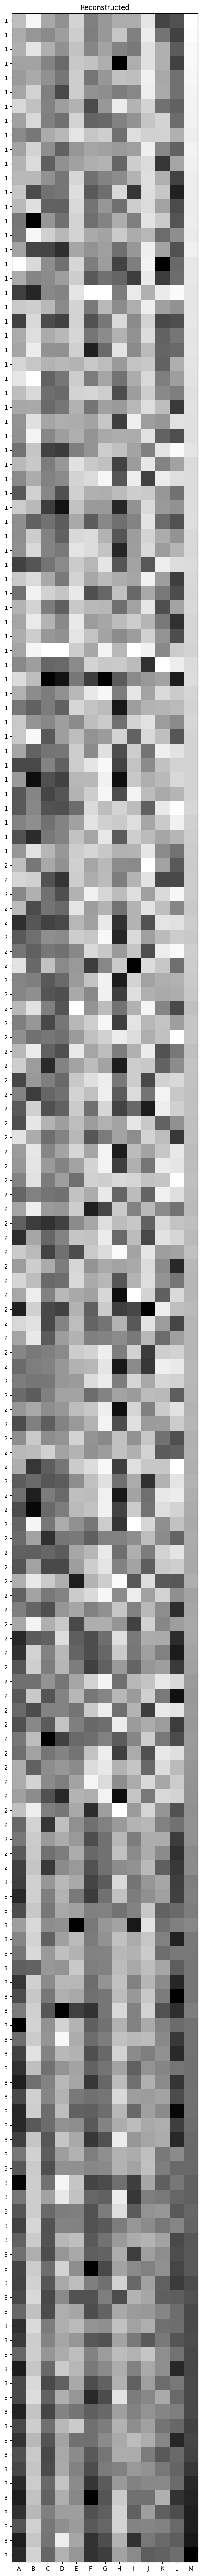

In [ ]:
array = sorted_data
scaler = MinMaxScaler()
array = scaler.fit_transform(array)
plt.figure(figsize=(25, 80))
plt.imshow(array, cmap='binary')
plt.xticks(range(df.shape[1]), df.columns)
plt.yticks(range(df.shape[0]), df.index)
plt.title("Reconstructed")
plt.show()

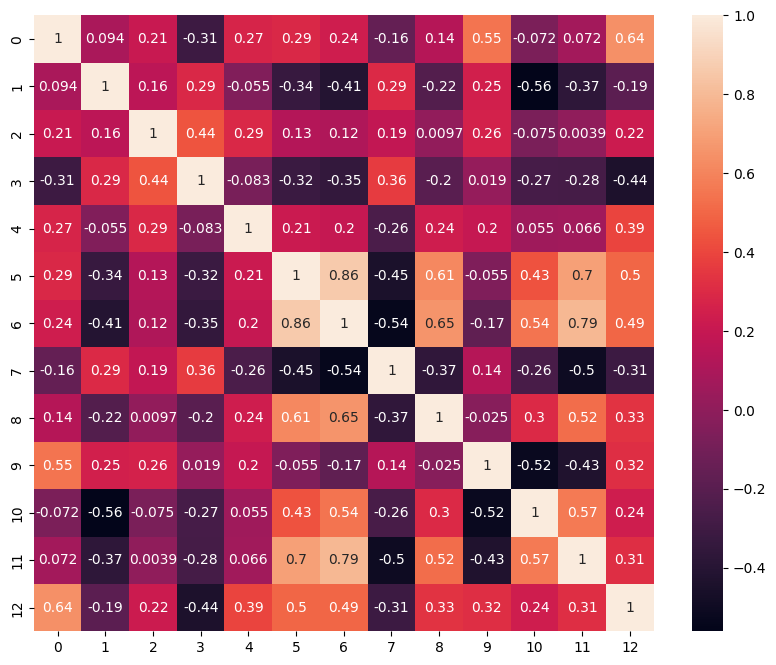

In [ ]:
recons_df = pd.DataFrame(data=sorted_data)
plt.figure(figsize=(10, 8))
correlation_mat = recons_df.corr(method="pearson")
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
correlation_mat = np.array(correlation_mat)
Mean_graph = np.zeros((len(df.columns), len(df.columns)))
Median_graph = np.zeros((len(df.columns), len(df.columns)))
for i in range(len(correlation_mat)):
    mean = np.mean(correlation_mat[:, i])
    median = np.median(correlation_mat[:, i])
    for j in range(len(correlation_mat)):
        if correlation_mat[j][i] >= mean:
            Mean_graph[j][i] = 1
        if correlation_mat[j][i] >= median:
            Median_graph[j][i] = 1
        continue

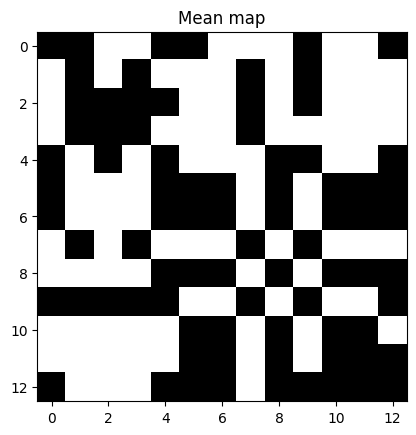

In [ ]:
plt.imshow(Mean_graph, cmap="binary")
plt.title("Mean map")
plt.show()

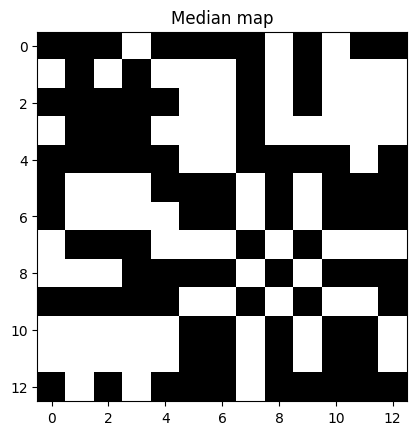

In [ ]:
plt.imshow(Median_graph, cmap="binary")
plt.title("Median map")
plt.show()

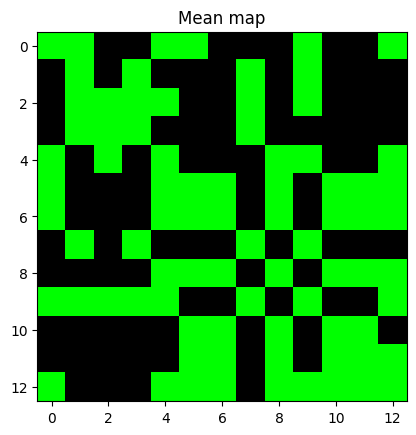

In [ ]:
plt.imshow(Mean_graph, cmap=cmap)
plt.title("Mean map")
plt.show()

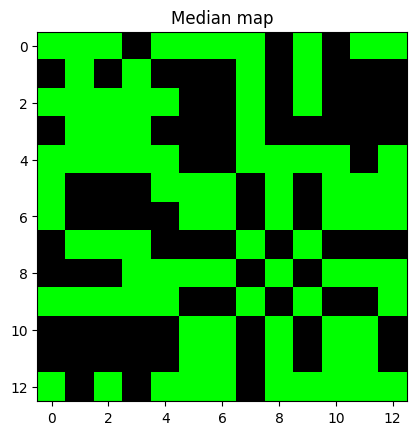

In [ ]:
plt.imshow(Median_graph, cmap=cmap)
plt.title("Median map")
plt.show()